In [1]:
import numpy as np

Perceptron vs McCulloch-Pitts Neuron

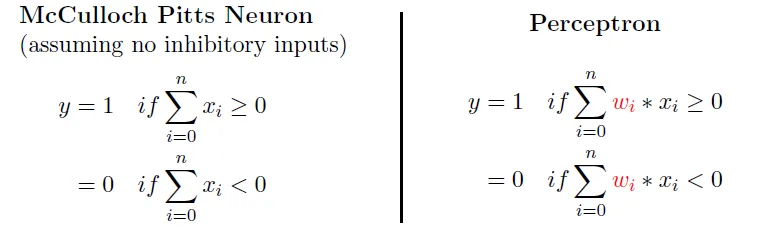

In [2]:
def unit_step(v):
  if v >= 0:
    return 1
  else:
    return 0

In [3]:
def perceptron(x, w, b):
  v = np.dot(w, x) + b
  y = unit_step(v)
  return y

In [4]:
def AND_percep(X):
  w = np.array([1, 1])
  b = -1.5
  return perceptron(X, w, b)

In [5]:
def OR_percep(X):
  w = np.array([1, 1])
  b = -0.5
  return perceptron(X, w, b)

In [6]:
def NOT_percep(X):
  return perceptron(X, w=-1, b=0.5)

In [7]:
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

In [8]:
print("AND({},{})= {}".format(1, 1, AND_percep(example1)))
print("AND({},{})= {}".format(1, 0, AND_percep(example2)))
print("AND({},{})= {}".format(0, 1, AND_percep(example3)))
print("AND({},{})= {}".format(0, 0, AND_percep(example4)))

AND(1,1)= 1
AND(1,0)= 0
AND(0,1)= 0
AND(0,0)= 0


In [9]:
print("OR({},{})= {}".format(1, 1, OR_percep(example1)))
print("OR({},{})= {}".format(1, 0, OR_percep(example2)))
print("OR({},{})= {}".format(0, 1, OR_percep(example3)))
print("OR({},{})= {}".format(0, 0, OR_percep(example4)))

OR(1,1)= 1
OR(1,0)= 1
OR(0,1)= 1
OR(0,0)= 0


In [10]:
NOT_percep(1)
NOT_percep(50)

NOT_percep(0)
NOT_percep(-50)

0

0

1

1

NAND

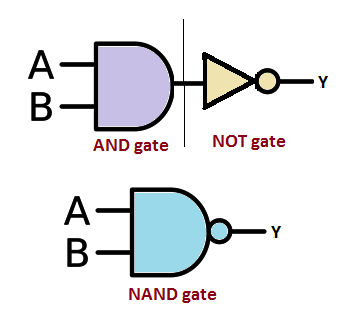

XOR

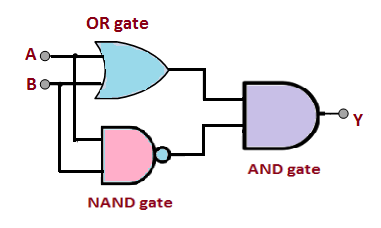

In [11]:
def XOR_net(X):
  gate_1 = AND_percep(X)
  gate_2 = NOT_percep(gate_1)
  gate_3 = OR_percep(X)
  new_X = np.array([gate_2, gate_3])
  output = AND_percep(new_X)
  return output

In [12]:
print("XOR({},{})= {}".format(1, 1, XOR_net(example1)))
print("XOR({},{})= {}".format(1, 0, XOR_net(example2)))
print("XOR({},{})= {}".format(0, 1, XOR_net(example3)))
print("XOR({},{})= {}".format(0, 0, XOR_net(example4)))

XOR(1,1)= 0
XOR(1,0)= 1
XOR(0,1)= 1
XOR(0,0)= 0


In [13]:
# Sigmoid activation function
def activation_func(value):
  return 1/(1+np.exp(-value))

In [14]:
def perceptron_train(in_data, labels, alpha, max_iter=1000):
  X = np.array(in_data)
  y = np.array(labels)

  weights = np.zeros(X.shape[1])  # Initialize weights with zeros
  bias = np.random.random()  # Random bias term

  for _ in range(max_iter):
    errors = 0
    for i in range(X.shape[0]):
      a = np.dot(X[i], weights) + bias  # Compute activation
      y_pred = 1 if a >= 0 else 0  # Step function
      if y_pred != y[i]:  # Update weights if prediction is incorrect
        weights += alpha * (y[i] - y_pred) * X[i]
        bias += alpha * (y[i] - y_pred)
        errors += 1
    if errors == 0:  # Stop if no errors
      break
  return weights, bias


# Test data
in_data = [
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0],
]
labels = [1, 1, 1, 0]
alpha = 0.005

weights, bias = perceptron_train(in_data, labels, alpha)
print("Weights:", weights)
print("Bias:", bias)

Weights: [0.005 0.005]
Bias: -0.004026661655607428


In [15]:
def TEST_percep(X):
  w = weights
  b = bias
  return perceptron(X, w, b)

In [16]:
print("TEST({},{})= {}".format(1, 1, TEST_percep(example1)))
print("TEST({},{})= {}".format(1, 0, TEST_percep(example2)))
print("TEST({},{})= {}".format(0, 1, TEST_percep(example3)))
print("TEST({},{})= {}".format(0, 0, TEST_percep(example4)))

TEST(1,1)= 1
TEST(1,0)= 1
TEST(0,1)= 1
TEST(0,0)= 0


In [17]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [18]:
def perceptron_train(in_data, labels, alpha, max_iter=1000):
  X = np.array(in_data)
  y = np.array(labels)
  weights = np.zeros(X.shape[1])  # Initialize weights with zeros
  bias = np.random.random()  # Random bias term

  for _ in range(max_iter):
    errors = 0
    for i in range(X.shape[0]):
      a = np.dot(X[i], weights) + bias  # Compute activation
      y_pred = sigmoid(a)  # Sigmoid activation function
      error = y[i] - y_pred
      weights += alpha * error * sigmoid_derivative(a) * X[i]
      bias += alpha * error * sigmoid_derivative(a)
      errors += np.abs(error)
    if errors < 0.01:  # Stop if error is small
      break
  return weights, bias


# Test data
in_data = [
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0],
]
labels = [1, 0, 0, 0]
alpha = 0.001

weights, bias = perceptron_train(in_data, labels, alpha, max_iter=100000)
print("Weights:", weights)
print("Bias:", bias)

Weights: [2.57545232 2.57549006]
Bias: -3.9901086611610364


In [19]:
def TEST_percep(X):
  w = weights
  b = bias
  return perceptron(X, w, b)

In [20]:
print("TEST({},{})= {}".format(1, 1, TEST_percep(example1)))
print("TEST({},{})= {}".format(1, 0, TEST_percep(example2)))
print("TEST({},{})= {}".format(0, 1, TEST_percep(example3)))
print("TEST({},{})= {}".format(0, 0, TEST_percep(example4)))

TEST(1,1)= 1
TEST(1,0)= 0
TEST(0,1)= 0
TEST(0,0)= 0
